In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = 'Homestays_Data(in).csv'
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
df1 = df.copy()

In [5]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [6]:
# Statistical Analysis - Reading Raw input data for insights and understanding

# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [7]:
df.shape

(74111, 29)

In [8]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [9]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

In [10]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

In [11]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

In [12]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

count   74111.00
mean        4.78
std         0.72
min         0.00
25%         4.32
50%         4.71
75%         5.22
max         7.60
Name: log_price, dtype: float64


C:\Users\vsyam\AppData\Local\Temp\ipykernel_11084\2137372986.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['log_price'], color='g', bins=100, hist_kws={'alpha': 0.4})
C:\Users\vsyam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_price', ylabel='Density'>

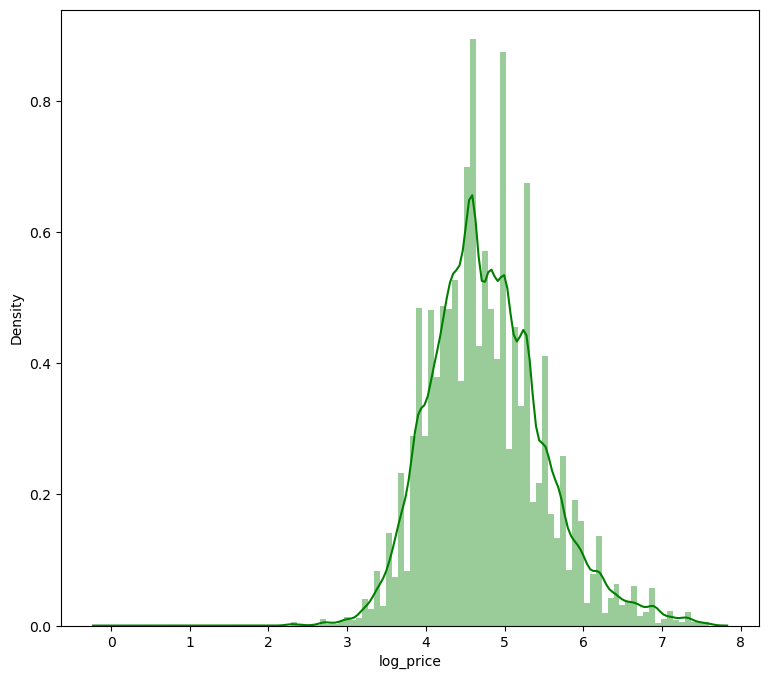

In [14]:
import seaborn as sns
print(df1['log_price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df1['log_price'], color='g', bins=100, hist_kws={'alpha': 0.4})

C:\Users\vsyam\AppData\Local\Temp\ipykernel_11084\1084839201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['log_price'], bins=20, hist=True, kde=True,
C:\Users\vsyam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


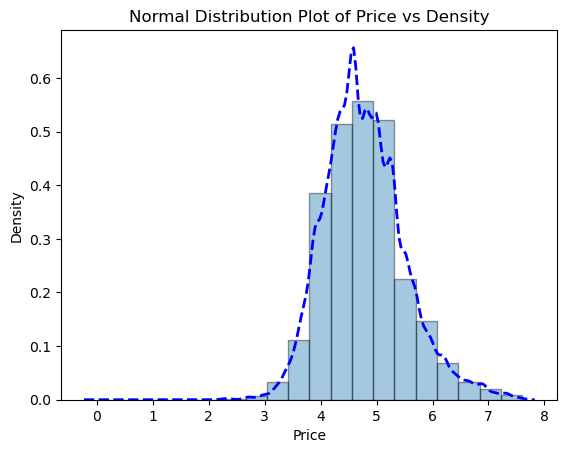

In [15]:
sns.distplot(df1['log_price'], bins=20, hist=True, kde=True, 
             hist_kws={'edgecolor':'black', 'alpha':0.4},
             kde_kws={'color': 'blue', 'linestyle': '--', 'linewidth': 2})

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Normal Distribution Plot of Price vs Density')

# Show the plot
plt.show()

In [184]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

id  log_price  accommodates  bathrooms  latitude  longitude  \
0   6901257       5.01             3       1.00     40.70     -73.99   
1   6304928       5.13             7       1.00     40.77     -73.99   
2   7919400       4.98             5       1.00     40.81     -73.94   
3  13418779       6.62             4       1.00     37.77    -122.43   
4   3808709       4.74             2       1.00     38.93     -77.03   

   number_of_reviews  review_scores_rating  bedrooms  beds  
0                  2                100.00      1.00  1.00  
1                  6                 93.00      3.00  3.00  
2                 10                 92.00      1.00  3.00  
3                  0                   NaN      2.00  2.00  
4                  4                 40.00      0.00  1.00

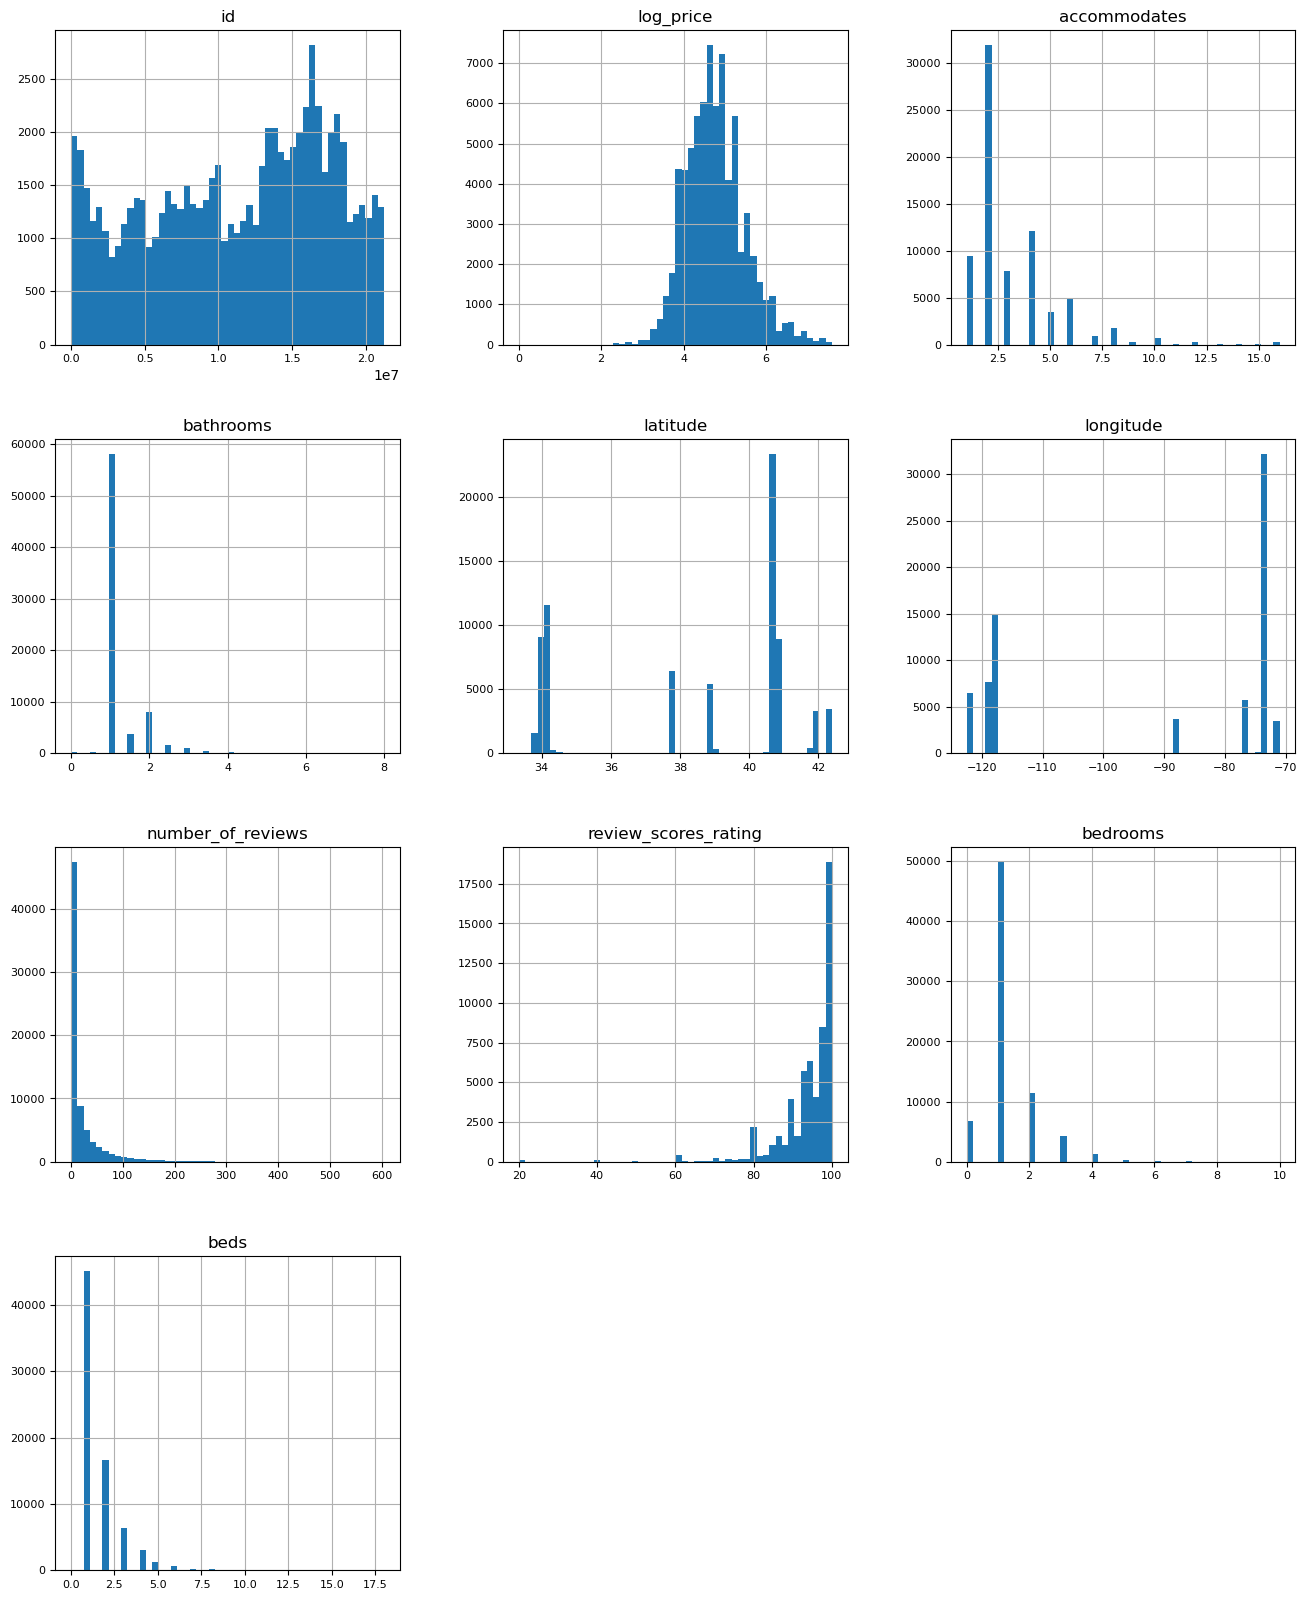

In [185]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [16]:
#1 . Data Cleaning and Pre-proccesing (Handling data)
# Manually pre-proccessing and filling null values and outliers meaningfully.

# 1.1 Filling null values from host_since column
df1['host_since'] = pd.to_datetime(df1['host_since'], format='mixed')
med = df1['host_since'].median()
m = df1['host_since'].mean()
s = df1['host_since'].std()
print("mean:",m)
print("median:",med)
print('std:',s)

mean: 2014-07-21 01:55:09.849437696
median: 2014-09-28 00:00:00
std: 661 days 11:55:52.200431088


In [17]:
df1['host_since'].fillna(med,inplace=True)
df1['host_since'] = df1['host_since'].dt.date

In [18]:
# 1.2 Filling null values for last_review column
df1['last_review'] = pd.to_datetime(df1['last_review'], format='mixed')
med1 = df1['last_review'].median()
m1 = df1['last_review'].mean()
s1 = df1['last_review'].std()
print("mean:",m1)
print("median:",med1)
print('std:',s1)

mean: 2017-03-14 19:27:18.789376
median: 2017-04-28 00:00:00
std: 231 days 17:30:53.954714948


In [19]:
df1['last_review'].fillna(med1,inplace=True)
df1['last_review'] = df1['last_review'].dt.date

In [20]:
# 1.3 Filling null values for first_review 
df1['first_review'] = pd.to_datetime(df1['first_review'], format='mixed')
med2 = df1['first_review'].median()
m2 = df1['first_review'].mean()
s2 = df1['first_review'].std()
print("mean:",m2)
print("median:",med2)
print('std:',s2)

mean: 2016-01-14 08:11:51.013442560
median: 2016-05-25 00:00:00
std: 496 days 08:07:48.244993600


In [21]:
df1['first_review'].fillna(med2,inplace=True)
df1['first_review'] = df1['first_review'].dt.date

In [22]:
df1[['host_since','first_review','last_review']]

host_since first_review last_review
0      2012-03-26   2016-06-18  2016-07-18
1      2017-06-19   2017-08-05  2017-09-23
2      2016-10-25   2017-04-30  2017-09-14
3      2015-04-19   2016-05-25  2017-04-28
4      2015-03-01   2015-05-12  2017-01-22
...           ...          ...         ...
74106  2013-03-24   2016-05-25  2017-04-28
74107  2016-05-03   2016-08-15  2017-04-15
74108  2012-01-05   2015-01-03  2017-09-10
74109  2017-09-17   2016-05-25  2017-04-28
74110  2012-11-26   2013-09-05  2017-04-30

[74111 rows x 3 columns]

In [23]:
# 1.4 Checking for outliers, any wrong entries and modifying ex. first_review < host_since , last_review < first_review

df1['host_since'] = pd.to_datetime(df1['host_since'])
df1['first_review'] = pd.to_datetime(df1['first_review'])

# Find rows where 'first_review' date is less than 'host_since' date
mask = df1['first_review'] < df1['host_since']

# Replace 'first_review' date with 'host_since' date where the condition is true
df1.loc[mask, 'first_review'] = df1.loc[mask, 'host_since']

In [24]:
df1['first_review'] = df1['first_review'].dt.date
df1['host_since'] = df1['host_since'].dt.date

In [25]:
df1['first_review'] = pd.to_datetime(df1['first_review'])
df1['last_review'] = pd.to_datetime(df1['last_review'])

# Find rows where 'first_review' date is less than 'host_since' date
mask1 = df1['last_review'] < df1['first_review']

# Replace 'first_review' date with 'host_since' date where the condition is true
df1.loc[mask1, 'last_review'] = df1.loc[mask1, 'first_review']

In [26]:
df1['last_review'] = df1['last_review'].dt.date
df1['first_review'] = df1['first_review'].dt.date

In [28]:
# Check for above outliers
df1['host_since'] = pd.to_datetime(df1['host_since'])
df1['last_review'] = pd.to_datetime(df1['last_review'])

# Filter rows where 'first_review' date is less than 'host_since' date
filtered_df = df1[df1['last_review'] < df1['host_since']]

# Get the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Print the number of rows where 'first_review' date is less than 'host_since' date
print("Number of rows where first_review date is less than host_since:", num_rows)

Number of rows where first_review date is less than host_since: 0


In [29]:
df1['last_review'] = df1['last_review'].dt.date
df1['host_since'] = df1['host_since'].dt.date

In [32]:
# 1.5 Filling null values from neighbourhood column
temp = df1[['latitude' , 'longitude' , 'neighbourhood']]
temp = temp.sort_values(by=['latitude', 'longitude'])
print(temp.head(20))
print(temp.isnull().sum())

       latitude  longitude neighbourhood
42232     33.34    -118.33           NaN
63200     33.34    -118.33           NaN
59902     33.34    -118.33           NaN
4317      33.34    -118.32           NaN
44131     33.34    -118.33           NaN
64969     33.34    -118.33           NaN
69934     33.34    -118.33           NaN
26402     33.34    -118.33           NaN
2461      33.34    -118.33           NaN
18396     33.34    -118.33           NaN
31296     33.35    -118.33           NaN
46773     33.35    -118.33           NaN
27310     33.35    -118.33           NaN
27138     33.35    -118.33           NaN
10862     33.71    -118.29     San Pedro
61940     33.71    -118.29     San Pedro
24482     33.71    -118.29           NaN
33320     33.71    -118.29     San Pedro
17177     33.71    -118.29     San Pedro
23484     33.71    -118.29     San Pedro
latitude            0
longitude           0
neighbourhood    6872
dtype: int64


In [33]:
for _ in range(6872):
    temp['neighbourhood']=temp['neighbourhood'].fillna(method = 'ffill')
    
specific_value = 'San Pedro'

# Replace NaN values in the first 14 rows of 'neighbourhood' column with the specific value
temp.loc[:13, 'neighbourhood'] = specific_value
temp.head(10)

C:\Users\vsyam\AppData\Local\Temp\ipykernel_11084\1224253276.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  temp['neighbourhood']=temp['neighbourhood'].fillna(method = 'ffill')


latitude  longitude neighbourhood
42232     33.34    -118.33     San Pedro
63200     33.34    -118.33     San Pedro
59902     33.34    -118.33     San Pedro
4317      33.34    -118.32     San Pedro
44131     33.34    -118.33     San Pedro
64969     33.34    -118.33     San Pedro
69934     33.34    -118.33     San Pedro
26402     33.34    -118.33     San Pedro
2461      33.34    -118.33     San Pedro
18396     33.34    -118.33     San Pedro

In [34]:
mapping_dict = {}

# Iterate over the DataFrame
for index, row in temp.iterrows():
    # Extract latitude, longitude, and neighbourhood from the current row
    latitude = row['latitude']
    longitude = row['longitude']
    neighbourhood = row['neighbourhood']
    
    # Create a tuple of latitude and longitude
    coordinate = (latitude, longitude)
    
    # Add the tuple as key and neighbourhood as value to the dictionary
    mapping_dict[coordinate] = neighbourhood
for i, (key, value) in enumerate(mapping_dict.items()):
    print(key, '->', value)
    if i == 10:  # Print only the first 10 key-value pairs
        break

(33.33890467, -118.3271249) -> San Pedro
(33.33900188, -118.3260722) -> San Pedro
(33.33900666, -118.3274207) -> San Pedro
(33.3393274, -118.3249009) -> San Pedro
(33.34052097, -118.3264437) -> San Pedro
(33.34091632, -118.3283178) -> San Pedro
(33.34301097, -118.3251075) -> San Pedro
(33.34328706, -118.3273575) -> San Pedro
(33.34357368, -118.3295569) -> San Pedro
(33.34362433, -118.3307988) -> San Pedro
(33.34514753, -118.3281215) -> San Pedro


In [35]:
for index, row in df1.iterrows():
    # Check if neighbourhood value is NaN
    if pd.isnull(row['neighbourhood']):
        # Extract latitude and longitude from the current row
        latitude = row['latitude']
        longitude = row['longitude']
        
        # Check if the (latitude, longitude) pair exists in the mapping dictionary
        coordinate = (latitude, longitude)
        if coordinate in mapping_dict:
            # If the coordinate exists in the mapping dictionary, fill the NaN value with the corresponding neighbourhood
            df1.at[index, 'neighbourhood'] = mapping_dict[coordinate]


In [36]:
df1[['latitude','longitude','neighbourhood']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       74111 non-null  float64
 1   longitude      74111 non-null  float64
 2   neighbourhood  74111 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.7+ MB


In [37]:
# 1.6 Filling null values for host_has_profile_pic column
#Fill null values with 't' as > 90% of other values are 't'.
df1['host_has_profile_pic'].fillna('t', inplace=True)

In [38]:
# 1.7 Filling null values for host_identity_verified column
#Fill null values with its corresponding previous host_has_profile_pic column
df1['host_identity_verified'] = df1['host_identity_verified'].fillna(df1['host_has_profile_pic'])

In [39]:
# 1.8 Filling null values for host_response_rate column
#Fill null values with mean of all non-null values i.e 90%. An alternative could be using interpolate.
df1['host_response_rate'].fillna('90%', inplace=True)

In [40]:
# 1.9 Filling null values for bathrooms column
# Fill null values in the 'bathroom' column with '1.0' Reason - Since the majority of values in the 'bathroom' column are '1.0' (80% of the data),replacing null values with '1.0' maintains consistency with the existing data and does not introduce significant bias.
df1['bathrooms'].fillna(1.0, inplace=True)

In [41]:
# 1.10 Filling null values for review_scores_rating column
df1['review_scores_rating'] = df1['review_scores_rating'].interpolate(method='linear')

In [42]:
# 1.11 Filling null values for thumbnail_url column
#Replaces a valid url with '1.0' and a NaN value with '0.0'
df1['thumbnail_url'] = df1['thumbnail_url'].notnull().astype(float)

In [43]:
# 1.12 Filling null values of zipcode column using forward filling method
df1['zipcode'] = df1['zipcode'].fillna(method = 'ffill')

C:\Users\vsyam\AppData\Local\Temp\ipykernel_11084\2138641872.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['zipcode'] = df1['zipcode'].fillna(method = 'ffill')


In [44]:
# 1.13 Filling null values for bedrooms column
df1['bedrooms'] = df1['bedrooms'].interpolate(method='linear')

In [45]:
# 1.14 Filling null values for beds column
df1['beds'] = df1['beds'].interpolate(method='linear')

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            74111 non-null  object 
 13  host_has_profile_pic    74111 non-null  object 
 14  host_identity_verified  74111 non-null

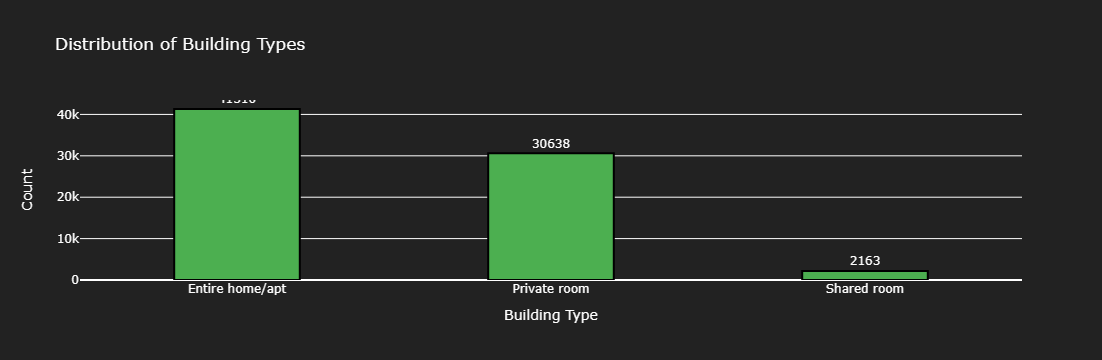

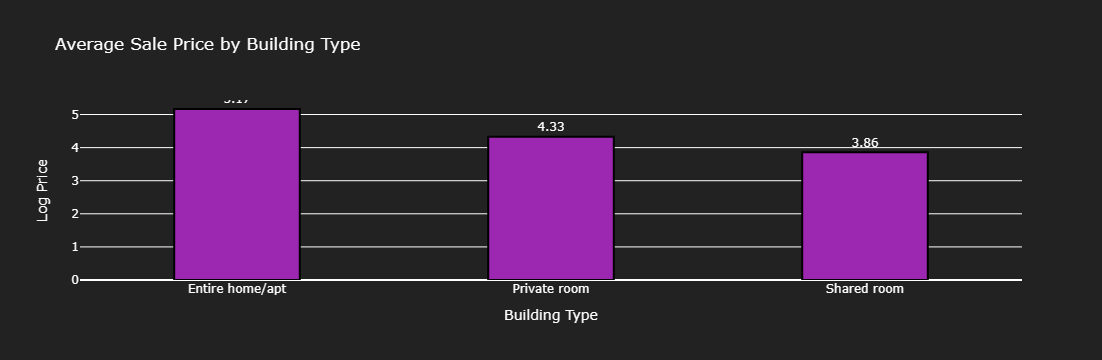

In [123]:
# Phase 2 - Exploratory Data Analysis(EDA)

# 1. Distribution of room types and their relation to log prices
dwelling_types = df1['room_type'].value_counts()
dwelling_prices = df1.groupby('room_type')['log_price'].mean()

# Format labels for the second graph
formatted_dwelling_prices = ['' + f'{value:,.2f}' for value in dwelling_prices.values]
# Create bar charts
fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    marker_color='rgb(76, 175, 80)',
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig1.update_layout(
    title='Distribution of Building Types',
    xaxis_title='Building Type',
    yaxis_title='Count',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)
fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    marker_color='rgb(156, 39, 176)',
    text=formatted_dwelling_prices,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by Building Type',
    xaxis_title='Building Type',
    yaxis_title='Log Price',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)
# Show the figures
fig1.show()
fig2.show()

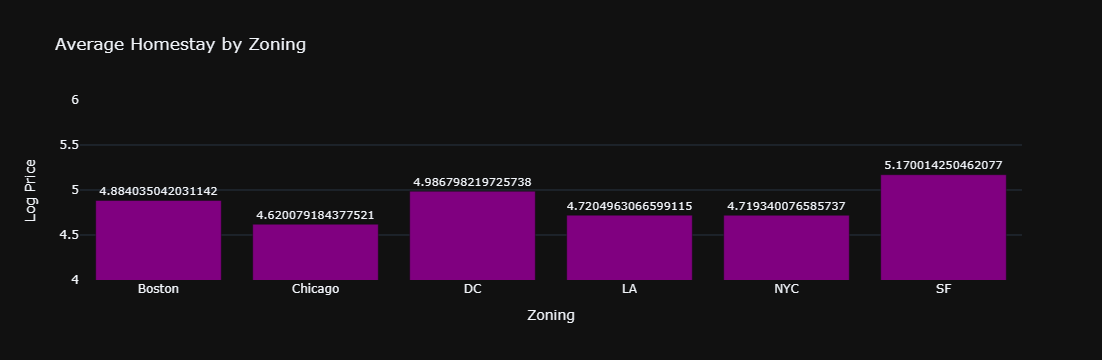

In [156]:
# 2. Zoning impact on sale price
zoning_prices = df1.groupby('city')['log_price'].mean()
fig3 = px.bar(x=zoning_prices.index, y=zoning_prices.values, title='Average Homestay by Zoning',
              color_discrete_sequence=['purple', 'green'], text=zoning_prices.values,
              template='plotly_dark')

fig3.update_traces(texttemplate='', textposition='outside')
fig3.update_yaxes(title='Log Price', tickprefix='', tickformat=',')
fig3.update_xaxes(title='Zoning')
fig3.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
y_axis_range = [4, 6]
fig3.update_layout(yaxis=dict(range=y_axis_range))
fig3.show()

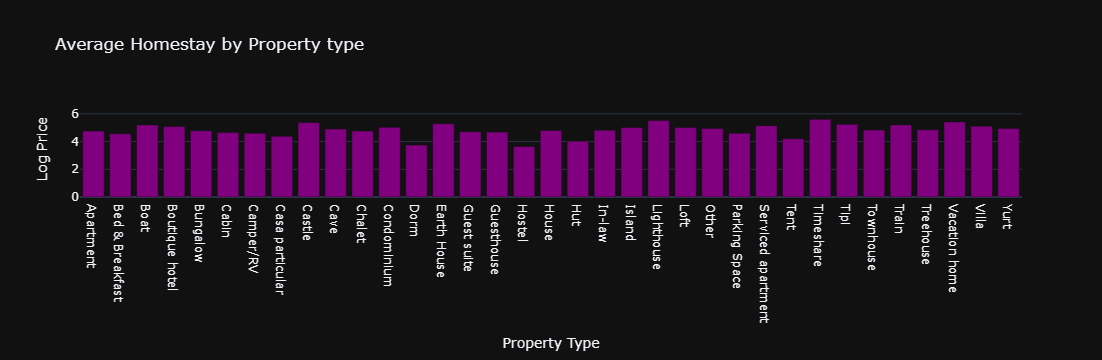

In [138]:
# 3. Property_type impact on sale price
ptype_prices = df1.groupby('property_type')['log_price'].mean()
fig4 = px.bar(x=ptype_prices.index, y=ptype_prices.values, title='Average Homestay by Property type',
              color_discrete_sequence=['purple', 'green'], text=ptype_prices.values,
              template='plotly_dark')

fig4.update_traces(texttemplate='', textposition='outside')
fig4.update_yaxes(title='Log Price', tickprefix='', tickformat=',')
fig4.update_xaxes(title='Property Type')
fig4.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
y_axis_range = [0, 7]
fig4.update_layout(yaxis=dict(range=y_axis_range))
fig4.show()

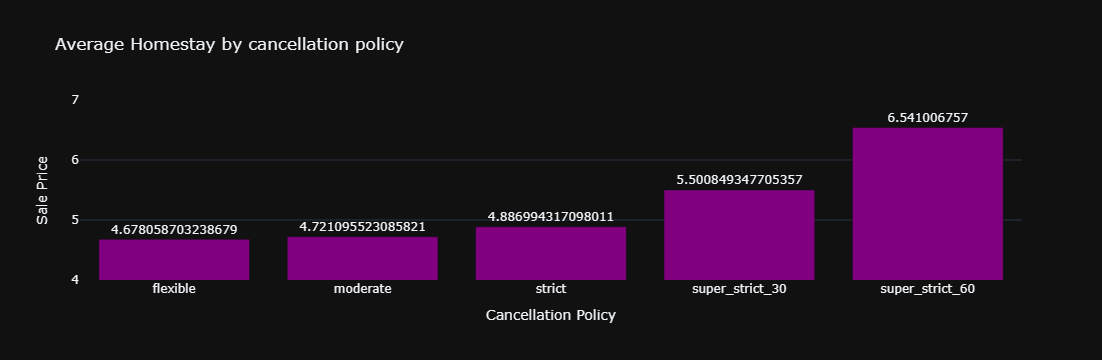

In [140]:
# 4. Cancellation_policy impact on sale price
cp_prices = df1.groupby('cancellation_policy')['log_price'].mean()
fig5 = px.bar(x=cp_prices.index, y=cp_prices.values, title='Average Homestay by cancellation policy',
              color_discrete_sequence=['purple', 'green'], text=cp_prices.values,
              template='plotly_dark')

fig5.update_traces(texttemplate='', textposition='outside')
fig5.update_yaxes(title='Sale Price', tickprefix='', tickformat=',')
fig5.update_xaxes(title='Cancellation Policy')
fig5.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
y_axis_range = [4, 7]
fig5.update_layout(yaxis=dict(range=y_axis_range))
# fig5.update_traces(marker=dict(line=dict(width=1)))
fig5.show()

Correlation between number_of_reviews and Log Price: -0.032469976188866226


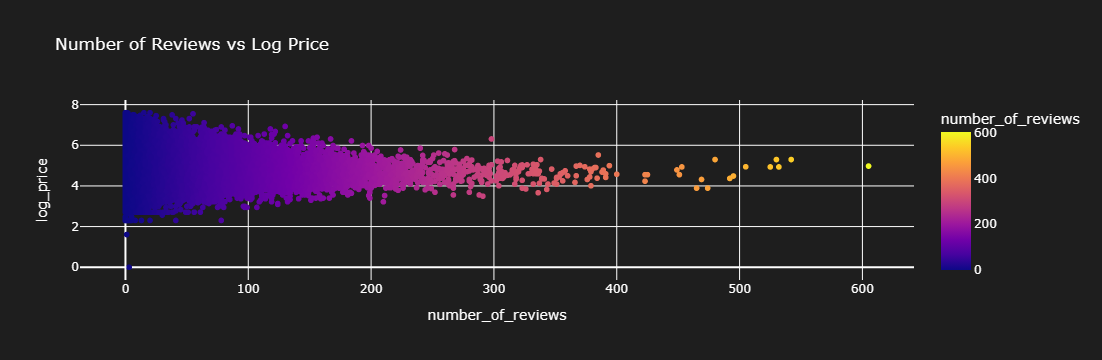

In [146]:
# 5 . Number_of_reviews impact on house price
nor_price_corr = df1['log_price'].corr(df1['number_of_reviews'])
print(f'Correlation between number_of_reviews and Log Price: {nor_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
fig6 = px.scatter(df1, x='number_of_reviews', y='log_price', title='Number of Reviews vs Log Price', color='number_of_reviews')

fig6.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig6.show()

Correlation between Accommodates and Log Price: 0.5675742149786183


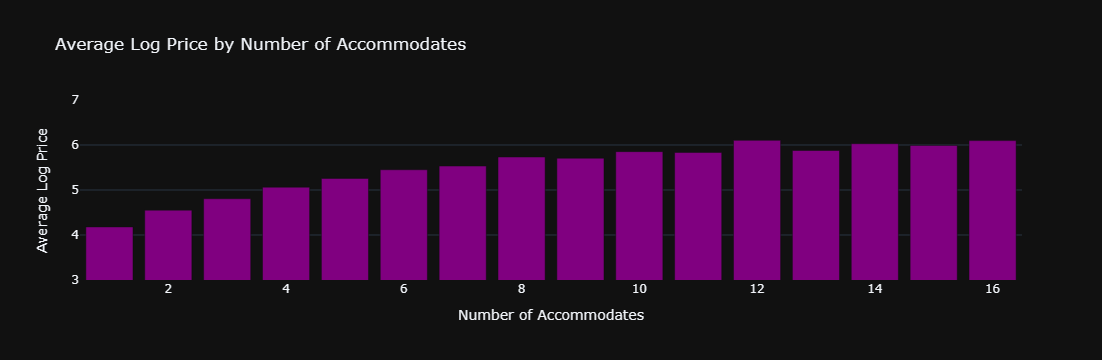

In [149]:
# 6 . Accomodates impact on house price
acc_price_corr = df1['log_price'].corr(df1['accommodates'])
print(f'Correlation between Accommodates and Log Price: {acc_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
average_log_price = df1.groupby('accommodates')['log_price'].mean().reset_index()

# Create the bar plot
fig7 = px.bar(average_log_price, x='accommodates', y='log_price', 
             title='Average Log Price by Number of Accommodates',
             labels={'accommodates': 'Number of Accommodates', 'log_price': 'Average Log Price'},
             color_discrete_sequence=['purple'],
             template='plotly_dark')

fig7.update_layout(xaxis_title='Number of Accommodates', yaxis_title='Average Log Price')
y_axis_range = [3, 7]
fig7.update_layout(yaxis=dict(range=y_axis_range))
fig7.show()

In [47]:
# Phase 3 - Feature Engineering
# This phase involves geneating new meaningful features, selecting relevant features, and transforming existing features to make them more suitable.
df1.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'original_price'],
      dtype='object')

In [48]:
# 2.1 Pre-proccess amenities column and create a new feature called amenities_count

def process_amenities(amenities_string):
    amenities_list = amenities_string.strip('{}').split(',')
    amenities_list = [amenity.strip('"') for amenity in amenities_list]
    processed_amenities = ', '.join(amenities_list)
    return processed_amenities

# Apply the function to each row in the amenities column
df1['processed_amenities'] = df1['amenities'].apply(process_amenities)

# Display the processed amenities
print(df1['processed_amenities'])

0        Wireless Internet, Air conditioning, Kitchen, ...
1        Wireless Internet, Air conditioning, Kitchen, ...
2        TV, Cable TV, Wireless Internet, Air condition...
3        TV, Cable TV, Internet, Wireless Internet, Kit...
4        TV, Internet, Wireless Internet, Air condition...
                               ...                        
74106                                                     
74107    TV, Cable TV, Internet, Wireless Internet, Kit...
74108    TV, Internet, Wireless Internet, Air condition...
74109    TV, Wireless Internet, Air conditioning, Kitch...
74110    TV, Internet, Wireless Internet, Kitchen, Free...
Name: processed_amenities, Length: 74111, dtype: object


In [49]:
def count_amenities(amenities_string):
    amenities_list = amenities_string.split(', ')
    amenities_count = len(amenities_list)
    return amenities_count

# Apply the function to each row in the processed_amenities column
df1['amenities_count'] = df1['processed_amenities'].apply(count_amenities)

# Display the DataFrame with the new column
df1['amenities_count']

0         9
1        15
2        19
3        15
4        12
         ..
74106     1
74107    16
74108    31
74109    15
74110    18
Name: amenities_count, Length: 74111, dtype: int64

In [50]:
# 2.2 Derive a new feature called 'Host_tenure' by determining the number of years from `host_since` to the current date.

from datetime import datetime
df1['host_since'] = pd.to_datetime(df1['host_since'])

# Calculate host tenure
current_date = datetime.now()
df1['host_tenure'] = (current_date - df1['host_since']).dt.days / 365.25  # Divide by 365.25 to get years considering leap years

# Display the DataFrame with the new column
df1[['host_tenure']]

host_tenure
0            12.12
1             6.89
2             7.53
3             9.05
4             9.19
...            ...
74106        11.12
74107         8.01
74108        12.34
74109         6.64
74110        11.45

[74111 rows x 1 columns]

In [51]:
# 2.3 Derive a new feature `Days_Since_Last_Review` by calculating the days between `last_review` and today to assess listing activity.

df1['last_review'] = pd.to_datetime(df1['last_review'])

# Calculate days since host since
current_date = datetime.now()
df1['days_since_last_review'] = (current_date - df1['last_review']).dt.days

# Display the DataFrame with the new column
df1[['days_since_last_review','last_review']]

days_since_last_review last_review
0                        2851  2016-07-18
1                        2419  2017-09-23
2                        2428  2017-09-14
3                        2567  2017-04-28
4                        2663  2017-01-22
...                       ...         ...
74106                    2567  2017-04-28
74107                    2580  2017-04-15
74108                    2432  2017-09-10
74109                    2425  2017-09-17
74110                    2565  2017-04-30

[74111 rows x 2 columns]

In [70]:
df1['last_review'] = df1['last_review'].dt.date
df1['host_since'] = df1['host_since'].dt.date

In [52]:
# 2.4 Replace host_response_rate value Dtype from object->float64 by removing '%' and converting it into a numerical feature
df1['host_response_rate'] = df1['host_response_rate'].str.rstrip('%').astype(float)

In [53]:
# 2.5 Converting cleaning_fee column objects from bool->float 
df1['cleaning_fee'] = df1['cleaning_fee'].replace({True: 1.0, False: 0.0})

In [67]:
# 2.6 Derive a new feature of sentiment scores from description column
temp = df1.copy()

In [60]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 657.6 kB/s eta 0:00:01
   ------------- -------------------------- 204.8/626.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 450.6/626.3 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
# 2.7 Perform sentiment analysis and derive a new feature 'sentiment_score'
from textblob import TextBlob
df1['sentiment_score'] = df1['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Map sentiment scores to numerical values
df1['sentiment_category'] = df1['sentiment_score'].apply(lambda score: 1 if score > 0 else (-1 if score < 0 else 0))
df1[['description','sentiment_score','sentiment_category']]

description  sentiment_score  \
0      Beautiful, sunlit brownstone 1-bedroom in the ...             0.72   
1      Enjoy travelling during your stay in Manhattan...             0.25   
2      The Oasis comes complete with a full backyard ...             0.27   
3      This light-filled home-away-from-home is super...             0.28   
4      Cool, cozy, and comfortable studio located in ...             0.20   
...                                                  ...              ...   
74106                          one room in bushwick apt              0.60   
74107  Located on the Pacific Coast Highway, this apa...             0.17   
74108  A modern apartment located in East Williamsbur...             0.23   
74109  Fully renovated, designer's studio located in ...             0.32   
74110  You will stay-aboard the Island Trader at one ...             0.14   

       sentiment_category  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
74106                   1  
74107                   1  
74108                   1  
74109                   1  
74110                   1  

[74111 rows x 3 columns]

In [65]:
pip install folium


   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ------- ------------------------------- 20.5/100.0 kB 640.0 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/100.0 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 816.1 kB/s eta 0:00:00


In [67]:
# 2.7 Derive a new feature from latitude, longitude and neighbourhood columns.(Geo-Spacial Analysis)
import folium
from sklearn.cluster import KMeans
map = folium.Map(location=[temp['latitude'].mean(), temp['longitude'].mean()], zoom_start=4)
for _, row in temp.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['neighbourhood']).add_to(map)

# Visualize Price Distribution by Region
for _, row in temp.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']], radius=5, color='blue', fill=True, fill_color='blue').add_to(map)

# Perform Clustering
kmeans = KMeans(n_clusters=3)
temp['cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

In [ ]:
map

C:\Users\vsyam\AppData\Local\Temp\ipykernel_11084\4154431830.py:29: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='longitude', y='latitude', hue='cluster', style='cluster', data=temp, palette='viridis', markers=['o', 's', 'D'], ax=axs[0])


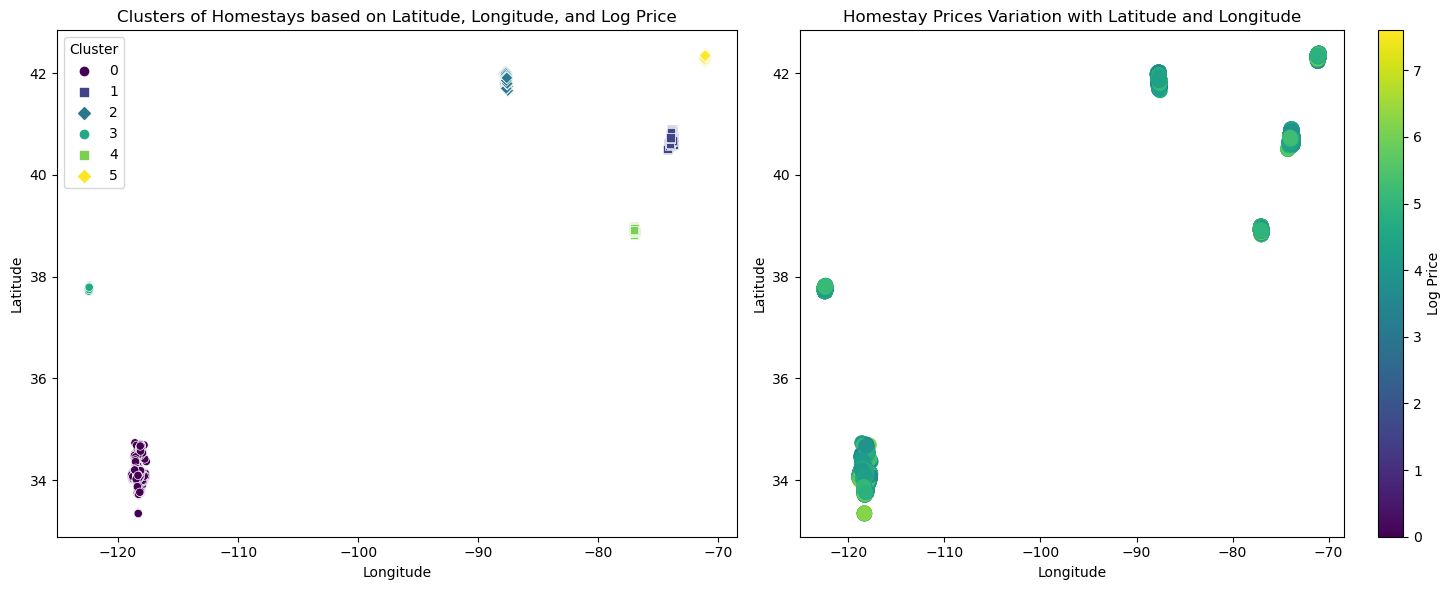

In [68]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=6)
temp['cluster'] = kmeans.fit_predict(temp[['latitude', 'longitude']])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot clusters based on latitude, longitude, and log_price
sns.scatterplot(x='longitude', y='latitude', hue='cluster', style='cluster', data=temp, palette='viridis', markers=['o', 's', 'D'], ax=axs[0])
axs[0].set_title('Clusters of Homestays based on Latitude, Longitude, and Log Price')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].legend(title='Cluster')

# Plot data points with latitude and longitude variation and log_price
scatter = axs[1].scatter(temp['longitude'], temp['latitude'], c=temp['log_price'], cmap='viridis', s=100)
axs[1].set_title('Homestay Prices Variation with Latitude and Longitude')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
plt.colorbar(scatter, ax=axs[1], label='Log Price')

plt.tight_layout()
plt.show()

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  float64
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            74111 non-null  object 
 13  host_has_profile_pic    74111 non-null  object 
 14  host_identity_verified  74111 non-null

In [72]:
categorical_features = temp.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

In [174]:
test_df = df1.copy()

In [175]:
test_df.drop(columns = ['id', 'amenities','neighbourhood', 'description','first_review','last_review','host_since','name', 'zipcode','processed_amenities','original_price','sentiment_category'],inplace=True)

In [171]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   accommodates            74111 non-null  int64  
 4   bathrooms               74111 non-null  float64
 5   bed_type                74111 non-null  object 
 6   cancellation_policy     74111 non-null  object 
 7   cleaning_fee            74111 non-null  float64
 8   city                    74111 non-null  object 
 9   host_has_profile_pic    74111 non-null  object 
 10  host_identity_verified  74111 non-null  object 
 11  host_response_rate      74111 non-null  float64
 12  instant_bookable        74111 non-null  object 
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [162]:
categorical_features = test_df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

In [176]:
# Converting categorical features to numerical features for model development (One-hot Encoding)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in test_df.columns:
#     if test_df[col].dtype == "object":
#         test_df[col] = le.fit_transform(test_df[col]).astype(float)
#         test_df[col] = le.fit_transform(test_df[col]).astype(float)
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder()

# Iterate through columns
for col in test_df.columns:
    if test_df[col].dtype == "object":
        # Transform the column using OneHotEncoder
        transformed_data = onehot_encoder.fit_transform(test_df[[col]])
        # Convert the transformed sparse matrix to an array and assign it to the DataFrame column
        test_df[col] = transformed_data.toarray().astype(float)

In [177]:
# Model Development and Training using Machine Learning

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 1: Split the data into features and target
X = test_df.drop(columns=['log_price'])
y = test_df['log_price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define three different models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42))
]

best_rmse = float('inf')
best_model_name = None
best_model = None

# Train and evaluate each model
for name, model in models:
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values with mean imputation
        ('scaler', StandardScaler()),                # Scale features to have mean=0 and variance=1
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{name} RMSE: {rmse}")

    if name in ['Random Forest Regressor', 'Gradient Boosting Regressor']:
        importances = pipeline.named_steps['model'].feature_importances_
        feature_names = X_train.columns
        feature_importances = dict(zip(feature_names, importances))
        sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
        print(f"Feature Importance for {name}:")
        for feature, importance in sorted_importances[:3]:
            print(f"{feature}: {importance}")
    
    # Analyze coefficients for linear regression
    elif name == 'Linear Regression':
        coefficients = pipeline.named_steps['model'].coef_
        feature_names = X_train.columns
        feature_coefficients = dict(zip(feature_names, coefficients))
        sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
        print(f"Coefficients for {name}:")
        for feature, coefficient in sorted_coefficients[:3]:
            print(f"{feature}: {coefficient}")
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_model_name = name
        best_model = pipeline

# Output the best model
print(f"Best model: {best_model_name} with RMSE: {best_rmse}")


Linear Regression RMSE: 0.4957870154782157
Coefficients for Linear Regression:
room_type: 0.32364025114013834
accommodates: 0.18559019348952124
latitude: 0.15272803080038808
Random Forest Regressor RMSE: 0.3960997659085782
Feature Importance for Random Forest Regressor:
room_type: 0.3623099716264569
bathrooms: 0.11692338242991587
longitude: 0.11244101075771824
Gradient Boosting Regressor RMSE: 0.41904251308710894
Feature Importance for Gradient Boosting Regressor:
room_type: 0.4961894482139143
bathrooms: 0.12567075085655338
longitude: 0.10293104464747226
Best model: Random Forest Regressor with RMSE: 0.3960997659085782


In [ ]:
# Model Optimization and Validation using hyper-parameter tuning

from sklearn.model_selection import GridSearchCV

pipeline_linear = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler()),                
    ('model', LinearRegression())               
])
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])
pipeline_gb = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Define the parameter grids for each model
param_grid_linear = {}
param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}
param_grid_gb = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5],
    'model__max_depth': [3, 5, 10]
}
# Define the models
models = [
    ('Linear Regression', pipeline_linear, param_grid_linear),
    ('Random Forest Regressor', pipeline_rf, param_grid_rf),
    ('Gradient Boosting Regressor', pipeline_gb, param_grid_gb)
]

# Train and evaluate each model
for name, pipeline, param_grid in models:
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_rmse = sqrt(-grid_search.best_score_)
    
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best RMSE for {name}: {best_rmse}")
    
# Output the best model
best_model_name = 'Gradient Boosting Regressor'  # Change this if needed
print(f"\nBest model: {best_model_name} with RMSE: {best_rmse}")

In [166]:
# Creating a Data Pipeline
# Why ? - So we have consistent infrastructure for transforming the test set. We can derive new features and add into pipeline easily
# Goal - To create infrastructure that lets us make changes without breaking everything

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Update categorical and numerical columns
categorical_columns = test1.select_dtypes(include=['object', 'category']).columns
numerical_columns = test1.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('log_price')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = test1.drop(columns = ['log_price'])
y = test1['log_price'] #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

In [165]:
# For testing Data pipeline architecture for Model Development
test1 = test_df.copy()

In [167]:
# Model development with Linear Regression(Data pipeline)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the model
model = LinearRegression()

# Define the hyperparameter grid for Linear Regression (empty as Linear Regression has no hyperparameters)
param_grid = {}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the Linear Regression model
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

# Get the best parameters and best RMSE
best_params = grid.best_params_
best_score = np.sqrt(-1 * grid.best_score_)

print(f'Best parameters for Linear Regression: {best_params}')
print(f'Best RMSE for Linear Regression: {best_score}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Linear Regression: {}
Best RMSE for Linear Regression: 0.4962806947887207


In [ ]:
# Model Development with Random Forest(Data Pipeline)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10],
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the Random Forest Regressor model
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

# Get the best parameters and best RMSE
best_params = grid.best_params_
best_score = np.sqrt(-1 * grid.best_score_)

print(f'Best parameters for Random Forest Regressor: {best_params}')
print(f'Best RMSE for Random Forest Regressor: {best_score}')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)
# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

In [ ]:
# Further enhancements 

# 1 . Handling missing values and outliers in more statistical and meaningfull way.
# 2 . Deriving more meaningfull features. 
# 3 . Scaling and Encoding numerical and categorial features properly through pipeline.
# 4 . Model Development using advance models i.e Deep Neural Networks.
